<a href="https://colab.research.google.com/github/saadkiet/CNN-FOR-CIFAR10-PROJECT-/blob/master/CNN_FOR_CIFAR10_(PROJECT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 : Set up and Install

In [0]:
pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 30kB/s 
     |████████████████████████████████| 3.9MB 39.7MB/s 
     |████████████████████████████████| 450kB 50.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=34040dbaaf23f2d616afef9dd43d835cf8b587c74b9d8756b3f46b5359adf23a
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc3 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.0
    Uninstal

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

In [0]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout

In [0]:
print(tf.__version__)

2.1.0


# Step 2 : Loading Cifar10 dataset

In [0]:
from tensorflow.keras.datasets import cifar10

In [0]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
xtrain.shape, ytrain.shape

((50000, 32, 32, 3), (50000, 1))

In [0]:
xtrain,xtest=xtrain/255,xtest/255

In [0]:
ytrain,ytest=ytrain.flatten(),ytest.flatten()

In [0]:
ytrain.shape

(50000,)

In [0]:
xtrain.max(),xtrain.min()

(1.0, 0.0)

In [0]:
class_names = ['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', '5: dog', '6: frog', '7: horse', '8: ship', '9: truck']

In [0]:
print(class_names)

['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', '5: dog', '6: frog', '7: horse', '8: ship', '9: truck']


In [0]:
xtrain[0].shape

(32, 32, 3)

# Step 3 : Building CNN model

In [0]:
# Build the model using the functional API
i = Input(shape=xtrain[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [0]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 15, 15, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              118067

In [0]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
r = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=15)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 50s 991us/sample - loss: 0.8209 - accuracy: 0.7098 - val_loss: 0.8795 - val_accuracy: 0.6920
Epoch 2/15
50000/50000 [==============================] - 49s 982us/sample - loss: 0.7581 - accuracy: 0.7311 - val_loss: 0.8760 - val_accuracy: 0.6949
Epoch 3/15
50000/50000 [==============================] - 50s 991us/sample - loss: 0.7005 - accuracy: 0.7498 - val_loss: 0.8450 - val_accuracy: 0.7031
Epoch 4/15
50000/50000 [==============================] - 49s 989us/sample - loss: 0.6465 - accuracy: 0.7692 - val_loss: 0.8582 - val_accuracy: 0.6994
Epoch 5/15
50000/50000 [==============================] - 49s 989us/sample - loss: 0.6091 - accuracy: 0.7837 - val_loss: 0.8530 - val_accuracy: 0.7074
Epoch 6/15
50000/50000 [==============================] - 49s 988us/sample - loss: 0.5665 - accuracy: 0.7974 - val_loss: 0.8917 - val_accuracy: 0.6989
Epoch 7/15
50000/50000 [====================

# Step 4 : Model Prediction

In [0]:
ypred = model.predict(xtest)

In [0]:
print(ypred)

[[1.08230114e-01 2.95917541e-02 7.26698190e-02 ... 7.01124966e-02
  2.95753423e-02 9.35150161e-02]
 [1.19485185e-06 1.16097983e-02 2.37589698e-16 ... 3.98817440e-18
  9.88387406e-01 1.59206138e-06]
 [3.80012281e-02 6.43649488e-04 3.54294491e-04 ... 5.69077019e-06
  9.60560441e-01 4.27379884e-04]
 ...
 [2.52623568e-06 5.53178415e-06 1.35275966e-03 ... 3.35979508e-04
  6.32481772e-07 3.65331471e-05]
 [9.68757318e-04 9.93737936e-01 1.18436590e-04 ... 2.14831980e-05
  1.59655442e-03 1.22318132e-04]
 [5.35379954e-08 2.65150346e-10 1.16422534e-07 ... 9.99765337e-01
  6.46788401e-09 7.48962634e-08]]


In [0]:
ypred=np.argmax(ypred,axis=1)

In [0]:
print(ypred)

[3 8 8 ... 5 1 7]


In [0]:
print(ypred[10],ytest[10])

0 0


# Step 5 : Model Evaluation

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm=confusion_matrix(ypred,ytest)
print(cm)

print(accuracy_score(ypred,ytest))

[[805  20  94  35  42  20  11  27  83  53]
 [ 19 834   8  16   4  12  12   3  45 108]
 [ 25   6 543  52  52  30  28  21   7   5]
 [ 10   6  63 490  68 194  71  44  14  10]
 [ 16   3  94  73 666  57  55  58   8   6]
 [  7   3  78 195  47 602  40  62   6   9]
 [  4   9  49  43  32  16 752   3   2   3]
 [ 15   2  32  36  74  44  11 751   3  17]
 [ 65  29  22  21  10  14  11   7 814  36]
 [ 34  88  17  39   5  11   9  24  18 753]]
0.701


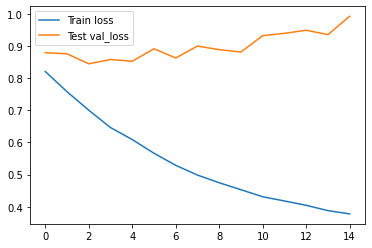

In [0]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='Train loss')
plt.plot(r.history['val_loss'], label='Test val_loss')
plt.legend()



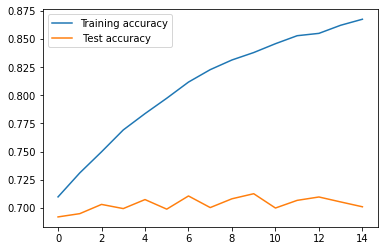

In [0]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='Training accuracy')
plt.plot(r.history['val_accuracy'], label=' Test accuracy')
plt.legend()

Confusion matrix, without normalization
[[805  19  25  10  16   7   4  15  65  34]
 [ 20 834   6   6   3   3   9   2  29  88]
 [ 94   8 543  63  94  78  49  32  22  17]
 [ 35  16  52 490  73 195  43  36  21  39]
 [ 42   4  52  68 666  47  32  74  10   5]
 [ 20  12  30 194  57 602  16  44  14  11]
 [ 11  12  28  71  55  40 752  11  11   9]
 [ 27   3  21  44  58  62   3 751   7  24]
 [ 83  45   7  14   8   6   2   3 814  18]
 [ 53 108   5  10   6   9   3  17  36 753]]


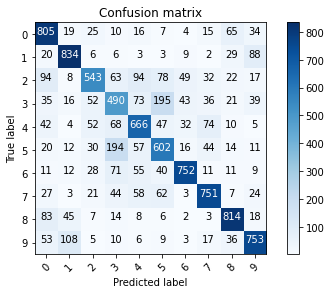

In [0]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(xtest).argmax(axis=1)
cm = confusion_matrix(ytest, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [0]:
print(class_names)

['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', '5: dog', '6: frog', '7: horse', '8: ship', '9: truck']


NameError: ignored

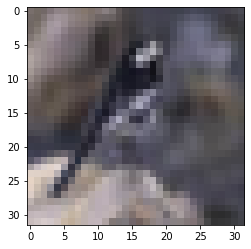

In [0]:
# Show some misclassified examples
# TODO: add label names
misclassified_idx = np.where(p_test != ytest)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(xtest[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[ytest[i]], labels[p_test[i]]));

# Alternative way of building the model (Sequential way)


In [0]:
xtrain.shape

(50000, 32, 32, 3)

In [0]:
model2=tf.keras.models.Sequential([
       tf.keras.layers.Conv2D(32,(3,3),strides=2,activation='relu',input_shape=[32, 32, 3]),
       tf.keras.layers.Conv2D(64,(3,3),strides=2,activation='relu'),
       tf.keras.layers.Conv2D(128,(3,3),strides=2,activation='relu'),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dropout(0.3),
       tf.keras.layers.Dense(1024,activation='relu'),
       tf.keras.layers.Dropout(0.3),
       tf.keras.layers.Dense(10,activation='softmax')                       
                                                      ])

In [0]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 15, 15, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1180672   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0

In [0]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
r2 = model2.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=15)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 50s 1ms/sample - loss: 1.5182 - accuracy: 0.4477 - val_loss: 1.2323 - val_accuracy: 0.5519
Epoch 2/15
50000/50000 [==============================] - 50s 992us/sample - loss: 1.2013 - accuracy: 0.5704 - val_loss: 1.0507 - val_accuracy: 0.6250
Epoch 3/15
50000/50000 [==============================] - 49s 990us/sample - loss: 1.0450 - accuracy: 0.6277 - val_loss: 0.9847 - val_accuracy: 0.6491
Epoch 4/15
50000/50000 [==============================] - 49s 987us/sample - loss: 0.9419 - accuracy: 0.6657 - val_loss: 0.9426 - val_accuracy: 0.6677
Epoch 5/15
50000/50000 [==============================] - 49s 988us/sample - loss: 0.8551 - accuracy: 0.6960 - val_loss: 0.8940 - val_accuracy: 0.6890
Epoch 6/15
50000/50000 [==============================] - 49s 990us/sample - loss: 0.7761 - accuracy: 0.7252 - val_loss: 0.8799 - val_accuracy: 0.6945
Epoch 7/15
50000/50000 [======================

In [0]:
ypred2 = model2.predict_classes(xtest)

In [0]:
print(ypred[2],ytest[2])

8 8


In [0]:
print(class_names)

['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', '5: dog', '6: frog', '7: horse', '8: ship', '9: truck']


In [0]:
cm1=confusion_matrix(ypred2,ytest)
print(cm1)

print(accuracy_score(ypred2,ytest))

[[748   8  58  15  19  10   7   9  47  27]
 [ 28 856   5   8   7   5  10   3  58 108]
 [ 32   5 510  45  43  24  18  14   4  13]
 [ 26  12  83 486  77 130  85  45  22  16]
 [ 16   2 122  63 667  38  62  50   9   4]
 [ 16   8 124 299  77 728  59  90  19  16]
 [  9   9  47  37  19  18 738   4   5   7]
 [ 17   3  28  32  73  36   8 765   4  15]
 [ 69  15  15   2  13   4   9   6 801  17]
 [ 39  82   8  13   5   7   4  14  31 777]]
0.7076


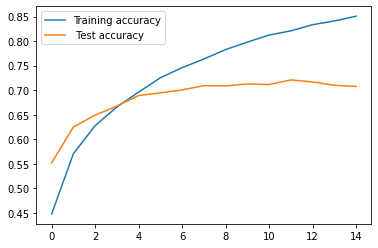

In [0]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r2.history['accuracy'], label='Training accuracy')
plt.plot(r2.history['val_accuracy'], label=' Test accuracy')
plt.legend()

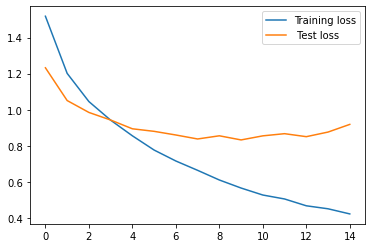

In [0]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r2.history['loss'], label='Training loss')
plt.plot(r2.history['val_loss'], label=' Test loss')
plt.legend()

In [0]:
#(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [0]:
#x_train.shape, y_train.shape

In [0]:
#x_train,x_test=x_train/255,x_test/255

In [0]:
#y_train,y_test=y_train.flatten(),y_test.flatten()

In [0]:
#y_train.shape

In [0]:
# Build the model using the functional API
#i1 = Input(shape=xtrain[0].shape)
#x1 = Conv2D(32, (3, 3), strides=2, activation='relu')(i1)
#x1 = Conv2D(64, (3, 3), strides=2, activation='relu')(x1)
#x1 = Conv2D(128, (3, 3), strides=2, activation='relu')(x1)
#x1 = Flatten()(x1)
#x1 = Dropout(0.3)(x1)
#x1 = Dense(1024, activation='relu')(x1)
#x1 = Dropout(0.3)(x1)
#x1 = Dense(10, activation='softmax')(x1)

#model1 = Model(i1, x1)

In [0]:
#model1.summary()

In [0]:
# Compile and fit
# Note: make sure you are using the GPU for this!
#model1.compile(optimizer='adam',
              #loss='sparse_categorical_crossentropy',
             #metrics=['accuracy'])

In [0]:
#r1 = model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)